# Task  3 - To Explore Unsupervised Machine Learning

From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually

# Problem Statement

The goal is to predict optimum numbaer of clusters and represent it visually

# Importing the required libraries and data set

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from sklearn.cluster import KMeans
 
import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv('../GRIP/iris.csv')
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


# Exploratory Data Analysis

In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [8]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
data.groupby('Species').sum()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1275,250.3,170.9,73.2,12.2
Iris-versicolor,3775,296.8,138.5,213.0,66.3
Iris-virginica,6275,329.4,148.7,277.6,101.3


In [17]:
data.groupby('Species').size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

# Different types of graphs

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

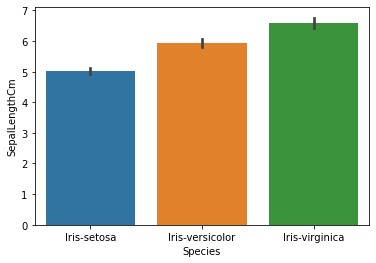

In [18]:
sns.barplot(data['Species'], data['SepalLengthCm'])

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

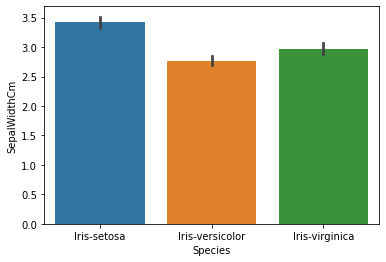

In [19]:
sns.barplot(data['Species'], data['SepalWidthCm'])

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

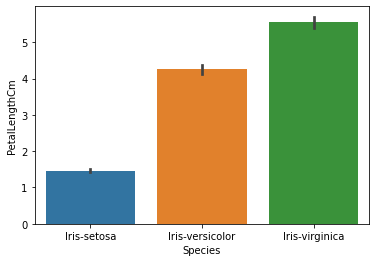

In [20]:
sns.barplot(data['Species'], data['PetalLengthCm'])

<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

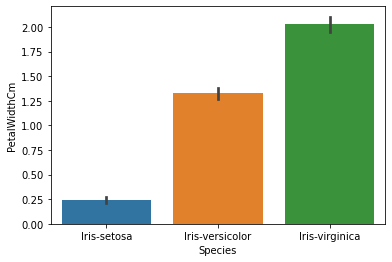

In [21]:
sns.barplot(data['Species'], data['PetalWidthCm'])

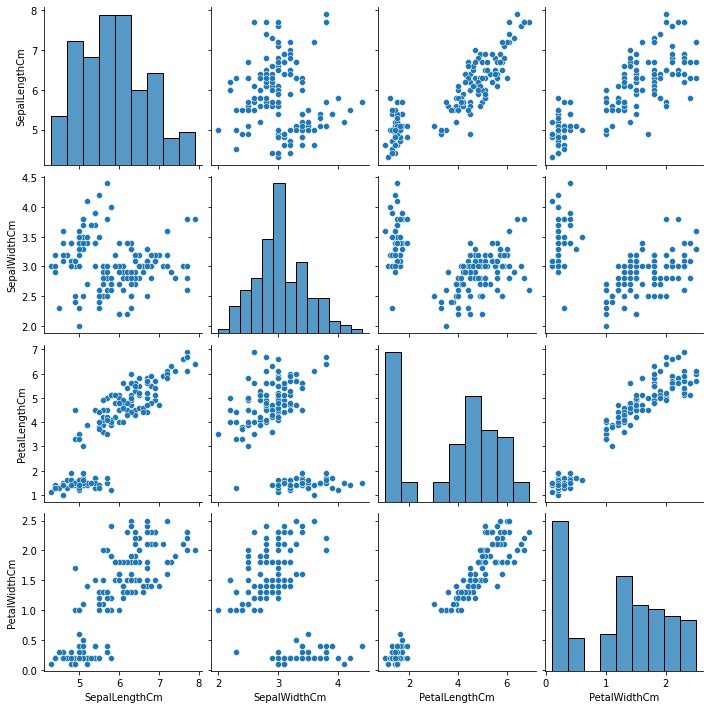

In [22]:
sns.pairplot(data.drop('Id',axis=1))

Text(0.5, 1.0, 'Cluster')

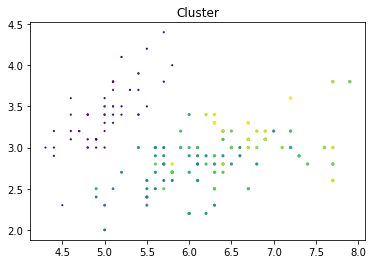

In [23]:
#plotting the data

plt.scatter(data['SepalLengthCm'],data['SepalWidthCm'],data['PetalLengthCm'],data['PetalWidthCm'])
plt.title('Cluster')

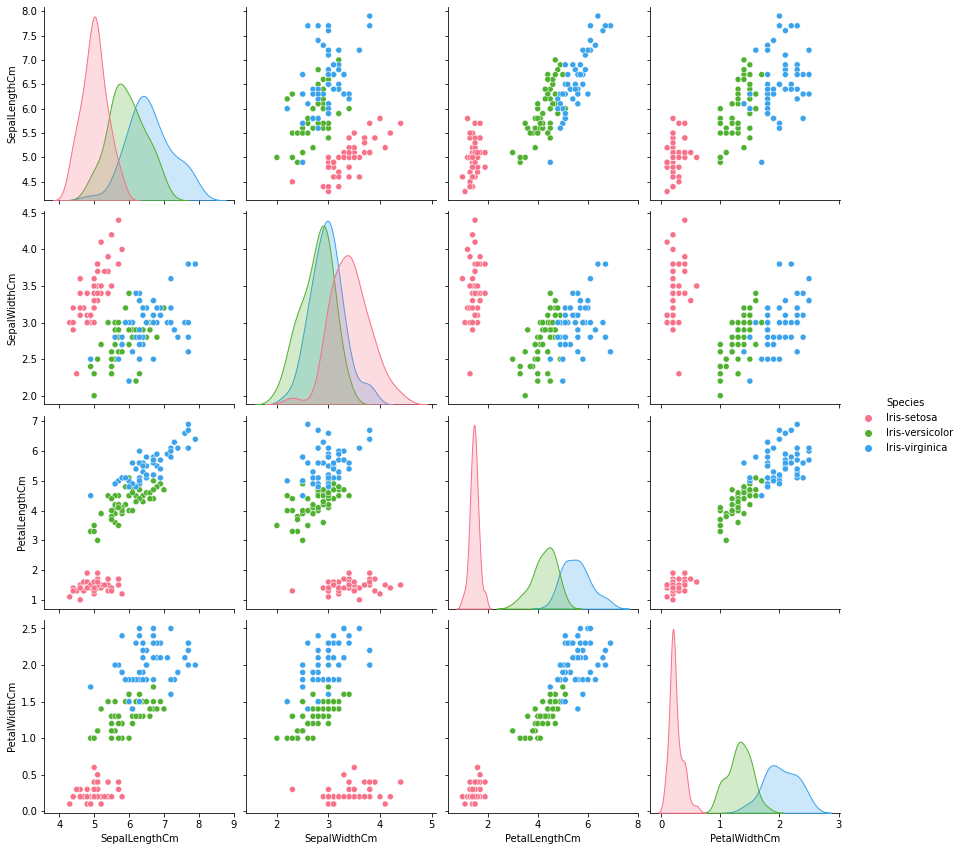

In [24]:
#plotting pair plot for "Species"
sns.pairplot(data.drop('Id',axis=1), hue="Species", palette="husl", size=3, diag_kind='kde')

<AxesSubplot:>

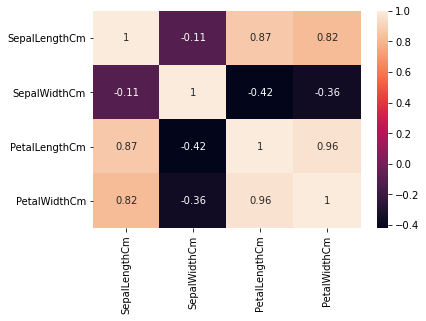

In [25]:
# Correlation Matrix
new_data= data.drop('Id',axis=1)
sns.heatmap(new_data.corr(), annot=True)

# Preparing the Algorithm

In [11]:
#Taking only required variables
X = data.iloc[:, [1, 2, 3, 4]].values

In [12]:
SSE=[]

In [13]:
for cluster in range(1,10):
    kmeans= KMeans(n_jobs= -1, n_clusters=cluster)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)


In [14]:
frame= pd.DataFrame({'cluster': range(1,10), 'SSE':SSE})


In [15]:
frame.head()

,cluster,SSE
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.317873
4,5,46.535582


# Elbow Curve - Helps to determining the number of Clusters

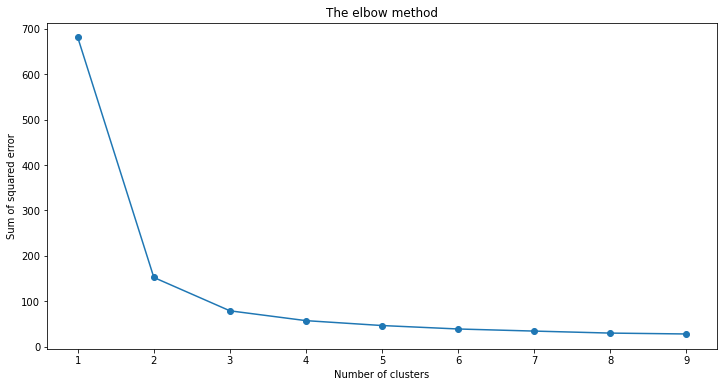

In [26]:
plt.figure(figsize=(12,6))
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared error')
plt.plot(frame['cluster'], frame['SSE'] , marker ="o")

        From the above graph, we see that elbow shape appears at 3. Hence, the optimum no. of Clusters is '3'

# Predicting

In [27]:
#Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
Y_pred = kmeans.fit_predict(X)

In [28]:
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Cluster Centers

In [29]:
#count of observation in each clusters 
data["Cluster"]=Y_pred
pd.value_counts(data["Cluster"])

2    62
1    50
0    38
Name: Cluster, dtype: int64

# Visualization of clusters

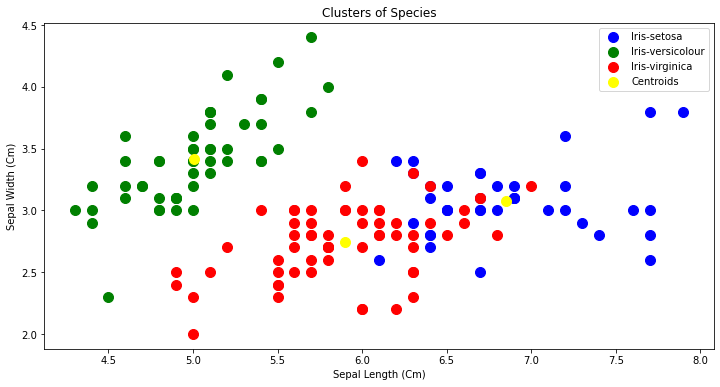

In [30]:
#Visualising the clusters of speal length and speal width

plt.figure(figsize =(12,6))
#plt.scatter(X,Y)
plt.scatter(X[Y_pred == 0, 0], X[Y_pred == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[Y_pred == 1, 0], X[Y_pred == 1, 1], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[Y_pred == 2, 0], X[Y_pred == 2, 1], s = 100, c = 'red', label = 'Iris-virginica')
#s==> size of the "dots"(green,red,etc)
#c==> color

#plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')

#label==> name given to a cluster
plt.title('Clusters of Species')
plt.xlabel('Sepal Length (Cm)')
plt.ylabel('Sepal Width (Cm)')
plt.legend()
plt.show()

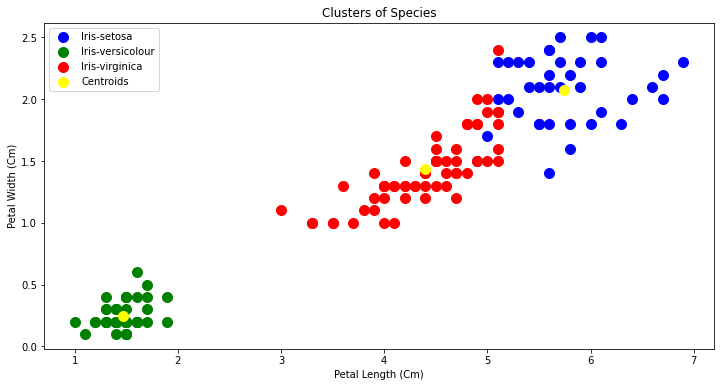

In [31]:
#Visualising the clusters of Petal Length and Petal Width

plt.figure(figsize =(12,6))
#plt.scatter(X,Y)
plt.scatter(X[Y_pred == 0, 2], X[Y_pred == 0, 3], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[Y_pred == 1, 2], X[Y_pred == 1, 3], s = 100, c = 'green', label = 'Iris-versicolour')
plt.scatter(X[Y_pred == 2, 2], X[Y_pred == 2, 3], s = 100, c = 'red', label = 'Iris-virginica')
#s==> size of the "dots"(green,red,etc)
#c==> color

#plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s = 100, c = 'yellow', label = 'Centroids')

#label==> name given to a cluster
plt.title('Clusters of Species')
plt.xlabel('Petal Length (Cm)')
plt.ylabel('Petal Width (Cm)')
plt.legend()
plt.show()